# TECHNOHACKS INTERNSHIP

## AUTHOR - RITIKA ROY CHOWDHURY ( DOMAIN- DATA ANALYTICS)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Step 1: Load the Titanic dataset 
data1 = pd.read_csv("Downloads/train.csv")
data2 = pd.read_csv("Downloads/test.csv")
data3 = pd.read_csv("Downloads/gender_submission.csv")

### TASK 1 - PERFORM DATA CLEANING

In [6]:
# Step 2: Check for missing values
print("Missing values in the train dataset:")
print(data1.isnull().sum())
print("\nMissing values in the test dataset:")
print(data2.isnull().sum())
print("\nMissing values in the gender submission dataset:")
print(data3.isnull().sum())

Missing values in the train dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values in the test dataset:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Missing values in the gender submission dataset:
PassengerId    0
Survived       0
dtype: int64


In [7]:
# Step 3: Remove rows with missing values
data_cleaned1 = data1.dropna()
data_cleaned2 = data2.dropna()
data_cleaned3 = data3.dropna()


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


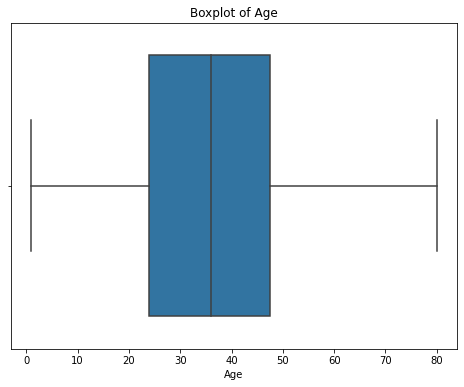

In [9]:
# Step 4: Handle outliers
# Here, we will identify and handle outliers for numerical columns (e.g., age, fare).
# For simplicity, we will use a boxplot to visualize potential outliers.
# For train dataset
# Boxplot for age
plt.figure(figsize=(8, 6))
sns.boxplot(data_cleaned1['Age'])
plt.xlabel('Age')
plt.title('Boxplot of Age')
plt.show()


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


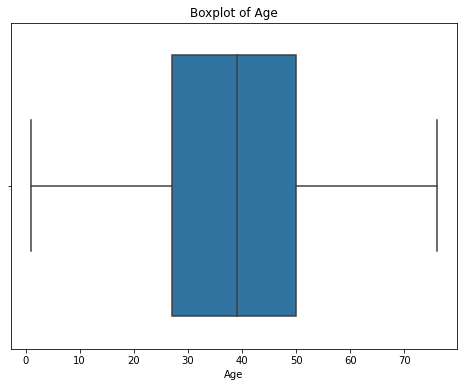

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


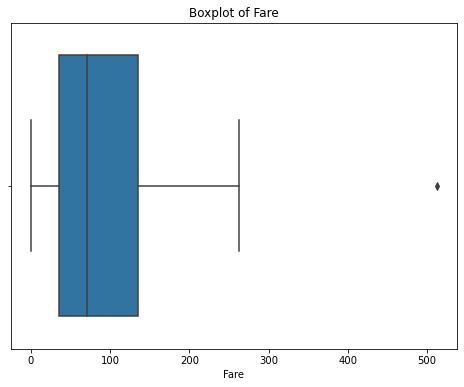

In [11]:
# For test dataset
# Boxplot for age
plt.figure(figsize=(8, 6))
sns.boxplot(data_cleaned2['Age'])
plt.xlabel('Age')
plt.title('Boxplot of Age')
plt.show()

# Boxplot for fare
plt.figure(figsize=(8, 6))
sns.boxplot(data_cleaned2['Fare'])
plt.xlabel('Fare')
plt.title('Boxplot of Fare')
plt.show()


In [13]:
# Step 5: Handle outliers 
# For this example, we will remove rows with outliers using a simple approach.
# You can choose more sophisticated methods depending on your analysis requirements.

# Remove rows with age outliers (outside 1.5 times the interquartile range) for train dataset
age_iqr = data_cleaned1['Age'].quantile(0.75) - data_cleaned1['Age'].quantile(0.25)
age_lower = data_cleaned1['Age'].quantile(0.25) - 1.5 * age_iqr
age_upper = data_cleaned1['Age'].quantile(0.75) + 1.5 * age_iqr
data_cleaned1 = data_cleaned1[(data_cleaned1['Age'] >= age_lower) & (data_cleaned1['Age'] <= age_upper)]

# Remove rows with age outliers (outside 1.5 times the interquartile range) for test dataset
age_iqr = data_cleaned2['Age'].quantile(0.75) - data_cleaned2['Age'].quantile(0.25)
age_lower = data_cleaned2['Age'].quantile(0.25) - 1.5 * age_iqr
age_upper = data_cleaned2['Age'].quantile(0.75) + 1.5 * age_iqr
data_cleaned2 = data_cleaned2[(data_cleaned2['Age'] >= age_lower) & (data_cleaned2['Age'] <= age_upper)]

# Remove rows with fare outliers (outside 1.5 times the interquartile range) for test dataset
fare_iqr = data_cleaned2['Fare'].quantile(0.75) - data_cleaned2['Fare'].quantile(0.25)
fare_lower = data_cleaned2['Fare'].quantile(0.25) - 1.5 * fare_iqr
fare_upper = data_cleaned2['Fare'].quantile(0.75) + 1.5 * fare_iqr
data_cleaned2 = data_cleaned2[(data_cleaned2['Fare'] >= fare_lower) & (data_cleaned2['Fare'] <= fare_upper)]



In [16]:
# Step 6: Verify the cleaned dataset
print("\nCleaned train dataset information:")
print(data_cleaned1.info())


Cleaned train dataset information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB
None


In [17]:
print("\nCleaned test dataset information:")
print(data_cleaned2.info())


Cleaned test dataset information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 12 to 414
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  86 non-null     int64  
 1   Pclass       86 non-null     int64  
 2   Name         86 non-null     object 
 3   Sex          86 non-null     object 
 4   Age          86 non-null     float64
 5   SibSp        86 non-null     int64  
 6   Parch        86 non-null     int64  
 7   Ticket       86 non-null     object 
 8   Fare         86 non-null     float64
 9   Cabin        86 non-null     object 
 10  Embarked     86 non-null     object 
dtypes: float64(2), int64(4), object(5)
memory usage: 8.1+ KB
None


### TASK 2: CALCULATE SUMMARY STATISTICS

In [18]:
# Calculate summary statistics for train dataset
# Calculate the mean
mean_values = data_cleaned1.mean()

# Calculate the median
median_values = data_cleaned1.median()

# Calculate the mode (returns a Series as there can be multiple modes)
mode_values = data_cleaned1.mode().iloc[0]

# Calculate the standard deviation
std_values = data_cleaned1.std()

# Step 3: Display the summary statistics
print("Summary Statistics:")
print("Mean:")
print(mean_values)
print("\nMedian:")
print(median_values)
print("\nMode:")
print(mode_values)
print("\nStandard Deviation:")
print(std_values)

Summary Statistics:
Mean:
PassengerId    455.366120
Survived         0.672131
Pclass           1.191257
Age             35.674426
SibSp            0.464481
Parch            0.475410
Fare            78.682469
dtype: float64

Median:
PassengerId    457.0
Survived         1.0
Pclass           1.0
Age             36.0
SibSp            0.0
Parch            0.0
Fare            57.0
dtype: float64

Mode:
PassengerId                                2
Survived                                 1.0
Pclass                                   1.0
Name           Allen, Miss. Elisabeth Walton
Sex                                     male
Age                                     36.0
SibSp                                    0.0
Parch                                    0.0
Ticket                                113760
Fare                                   26.55
Cabin                                B96 B98
Embarked                                   S
Name: 0, dtype: object

Standard Deviation:
PassengerId    

C:\Users\hp\AppData\Local\Temp/ipykernel_9360/3153602826.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_values = data_cleaned1.mean()
C:\Users\hp\AppData\Local\Temp/ipykernel_9360/3153602826.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median_values = data_cleaned1.median()
C:\Users\hp\AppData\Local\Temp/ipykernel_9360/3153602826.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std_values = data_cleaned1.std()


In [20]:
# Calculate summary statistics for test data
# Calculate the mean
mean_values = data_cleaned2.mean()

# Calculate the median
median_values = data_cleaned2.median()

# Calculate the mode (returns a Series as there can be multiple modes)
mode_values = data_cleaned2.mode().iloc[0]

# Calculate the standard deviation
std_values = data_cleaned2.std()

# Step 3: Display the summary statistics
print("Summary Statistics:")
print("Mean:")
print(mean_values)
print("\nMedian:")
print(median_values)
print("\nMode:")
print(mode_values)
print("\nStandard Deviation:")
print(std_values)

Summary Statistics:
Mean:
PassengerId    1101.174419
Pclass            1.139535
Age              39.029070
SibSp             0.604651
Parch             0.476744
Fare             93.292686
dtype: float64

Median:
PassengerId    1091.0000
Pclass            1.0000
Age              39.0000
SibSp             1.0000
Parch             0.0000
Fare             67.3208
dtype: float64

Mode:
PassengerId                              904
Pclass                                   1.0
Name           Abelseth, Mr. Olaus Jorgensen
Sex                                   female
Age                                     30.0
SibSp                                    1.0
Parch                                    0.0
Ticket                                113503
Fare                                   211.5
Cabin                        B57 B59 B63 B66
Embarked                                   C
Name: 0, dtype: object

Standard Deviation:
PassengerId    126.675890
Pclass           0.438253
Age             15.170667

C:\Users\hp\AppData\Local\Temp/ipykernel_9360/1720852025.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_values = data_cleaned2.mean()
C:\Users\hp\AppData\Local\Temp/ipykernel_9360/1720852025.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median_values = data_cleaned2.median()
C:\Users\hp\AppData\Local\Temp/ipykernel_9360/1720852025.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std_values = data_cleaned2.std()


In [21]:
# Calculate summary statistics for gender submission dataset
# Calculate the mean
mean_values = data3.mean()

# Calculate the median
median_values = data3.median()

# Calculate the mode (returns a Series as there can be multiple modes)
mode_values = data3.mode().iloc[0]

# Calculate the standard deviation
std_values = data3.std()

# Step 3: Display the summary statistics
print("Summary Statistics:")
print("Mean:")
print(mean_values)
print("\nMedian:")
print(median_values)
print("\nMode:")
print(mode_values)
print("\nStandard Deviation:")
print(std_values)

Summary Statistics:
Mean:
PassengerId    1100.500000
Survived          0.363636
dtype: float64

Median:
PassengerId    1100.5
Survived          0.0
dtype: float64

Mode:
PassengerId    892.0
Survived         0.0
Name: 0, dtype: float64

Standard Deviation:
PassengerId    120.810458
Survived         0.481622
dtype: float64


### TASK 3: VISUALIZATION USING HISTOGRAM

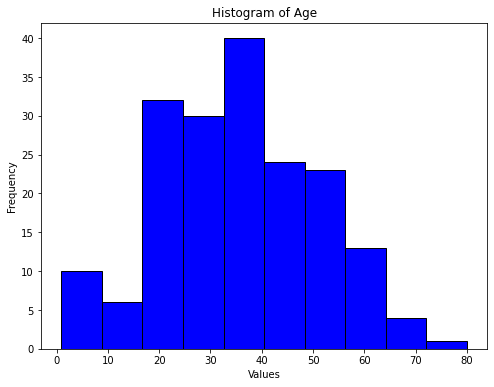

In [25]:
# Create a histogram to visualize the distribution of age in train dataset
column_name = 'Age'
plt.figure(figsize=(8, 6))
plt.hist(data_cleaned1[column_name], bins=10, color='blue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title(f'Histogram of Age')
plt.show()

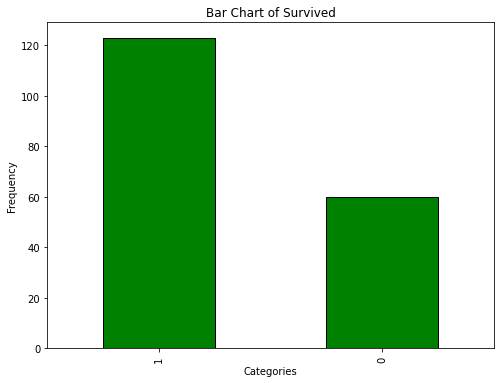

In [26]:
# Create a bar chart to visualize the distribution of survived in train dataset
column_name = 'Survived'
plt.figure(figsize=(8, 6))
data_cleaned1[column_name].value_counts().plot(kind='bar', color='green', edgecolor='black')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title(f'Bar Chart of Survived')
plt.show()

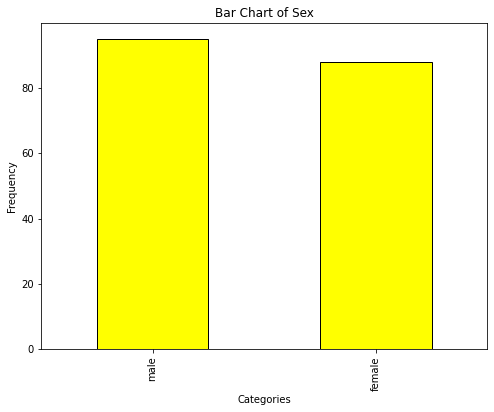

In [27]:
# Create a bar chart to visualize the distribution of sex in train dataset
column_name = 'Sex'
plt.figure(figsize=(8, 6))
data_cleaned1[column_name].value_counts().plot(kind='bar', color='yellow', edgecolor='black')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title(f'Bar Chart of Sex')
plt.show()

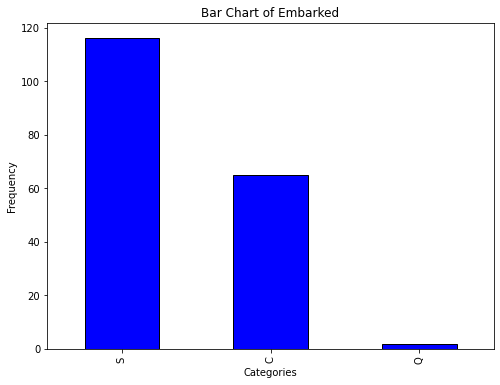

In [28]:
# Create a bar chart to visualize the distribution of embarked in train dataset
column_name = 'Embarked'
plt.figure(figsize=(8, 6))
data_cleaned1[column_name].value_counts().plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title(f'Bar Chart of Embarked')
plt.show()

# THANK YOU